### Initialize the environment

In [66]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [68]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [69]:
run=1
date_time='2017-02-20_2125' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [70]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.02],
   u'persistent': True},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [20],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': True},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.04],
   u'persistent': True}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.01, 0.01],
  u'persistent': True},
 u'uuid': u'3c5

### Load the dataset and visualize the input of the pathways

In [71]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [72]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

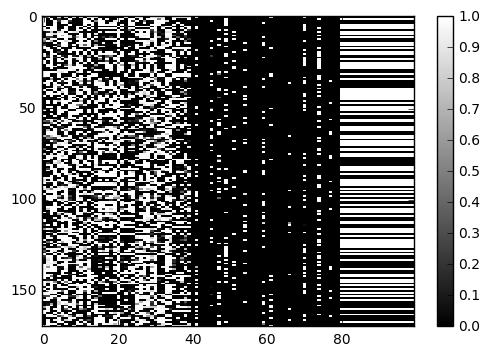

In [73]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [74]:
joint_layer[1:10,1:10]

array([[  2.46294007e-07,   9.99703228e-01,   9.82490965e-05,
          1.70403451e-01,   6.08364632e-03,   3.64104140e-04,
          9.99992549e-01,   1.42516496e-04,   3.18355486e-03],
       [  3.38054122e-03,   6.20022276e-03,   9.99336600e-01,
          2.15268463e-01,   8.96065116e-01,   9.94037569e-01,
          1.82422861e-01,   3.26598592e-06,   3.40289669e-04],
       [  3.96122523e-05,   1.88047928e-03,   9.72582281e-01,
          7.82825612e-03,   9.94283080e-01,   9.76928234e-01,
          3.37013416e-03,   1.73442010e-02,   6.30691601e-03],
       [  5.89420553e-04,   1.23663933e-03,   9.99998093e-01,
          1.54246390e-02,   6.81946345e-04,   2.00774823e-03,
          9.99657989e-01,   8.20599817e-05,   2.27819128e-05],
       [  9.97804403e-01,   9.96062219e-01,   9.89427984e-01,
          9.91008058e-03,   4.87772003e-03,   9.98795629e-01,
          8.12761858e-03,   6.02943182e-04,   9.90875483e-01],
       [  1.63527801e-07,   9.99991655e-01,   1.00000000e+00,
   

### Check the weights distributions

([array([  0.00000000e+00,   2.00000000e+00,   1.01000000e+02,
           1.81400000e+03,   7.75100000e+03,   8.02600000e+03,
           2.07800000e+03,   1.61000000e+02,   4.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   4.40000000e+01,   4.81000000e+02,
           2.64100000e+03,   6.54600000e+03,   7.03600000e+03,
           2.82200000e+03,   3.55000000e+02,   1.10000000e+01,
           1.00000000e+00]),
  array([  0.00000000e+00,   4.00000000e+00,   2.57000000e+02,
           2.35800000e+03,   6.93300000e+03,   7.70700000e+03,
           2.46300000e+03,   2.08000000e+02,   7.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.00000000e+00,   6.50000000e+01,
           1.44800000e+03,   7.55300000e+03,   8.81000000e+03,
           1.97700000e+03,   8.30000000e+01,   0.00000000e+00,
           0.00000000e+00]),
  array([  2.00000000e+00,   3.10000000e+01,   5.12000000e+02,
           3.03100000e+03,   6.90300000e+03,   6.47300000e+03,
  

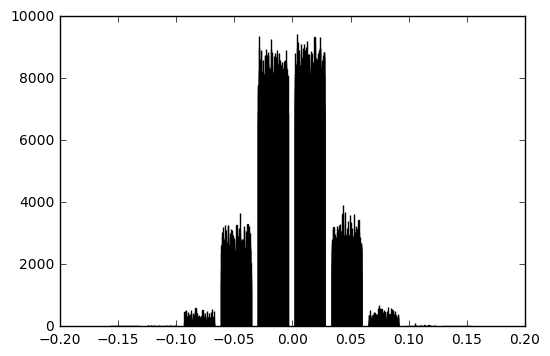

In [75]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x14e619b90>,
 <a list of 3 Text xticklabel objects>)

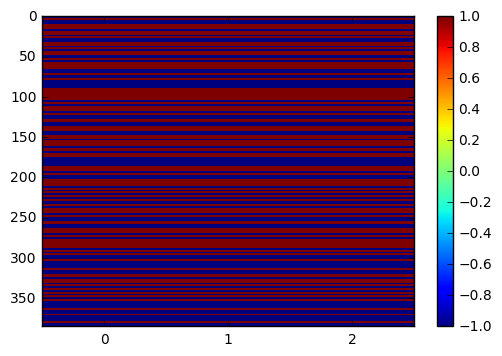

In [76]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x14e263ed0>,
 <a list of 3 Text xticklabel objects>)

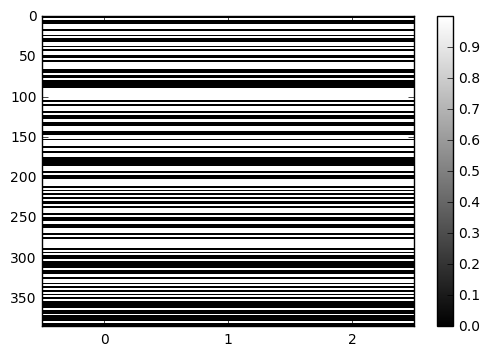

In [77]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  89.]),
  array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  89.]),
  array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  89.])],
 array([  1.66931139e-11,   9.98383641e-02,   1.99676728e-01,
          2.99515092e-01,   3.99353457e-01,   4.99191821e-01,
          5.99030185e-01,   6.98868549e-01,   7.98706913e-01,
          8.98545277e-01,   9.98383641e-01]),
 <a list of 3 Lists of Patches objects>)

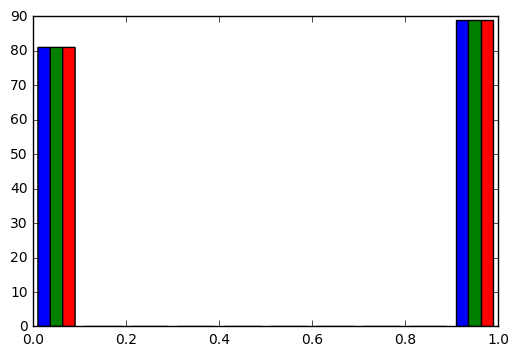

In [78]:
plt.hist(top_output)

In [79]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [80]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 81.,  89.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

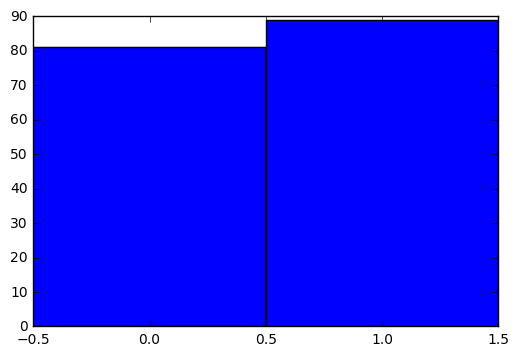

In [81]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [82]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [83]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [84]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


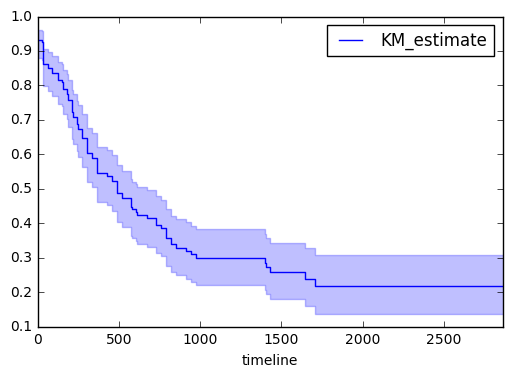

In [85]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

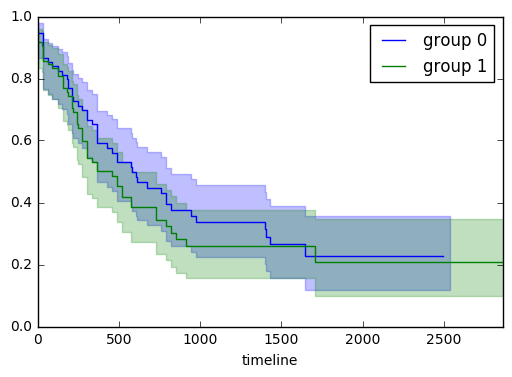

In [86]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)